                      變數       重要性
27           cabbage_交易量  0.479480
3        north_平均風速(m/s)  0.229407
1          north_平均氣溫(℃)  0.026890
26             Fuel_High  0.020828
9        south_平均風速(m/s)  0.018362
21        east_平均風速(m/s)  0.015447
25               Fuel_95  0.013920
12     central_平均氣壓(hPa)  0.013753
24               Fuel_92  0.013230
5     north_累積日射量(MJ/m2)  0.013116
13       central_平均氣溫(℃)  0.012915
11    south_累積日射量(MJ/m2)  0.011909
15     central_平均風速(m/s)  0.011897
8       south_平均相對溼度( %)  0.011773
17  central_累積日射量(MJ/m2)  0.010129
7          south_平均氣溫(℃)  0.009999
19          east_平均氣溫(℃)  0.009891
18        east_平均氣壓(hPa)  0.009620
22         east_累計雨量(mm)  0.009593
20       east_平均相對溼度( %)  0.009162
6        south_平均氣壓(hPa)  0.007782
10        south_累計雨量(mm)  0.007634
0        north_平均氣壓(hPa)  0.006301
2       north_平均相對溼度( %)  0.005725
14    central_平均相對溼度( %)  0.005553
4         north_累計雨量(mm)  0.005485
16      central_累計雨量(mm)  0.005133
23     east_累積日射量(MJ

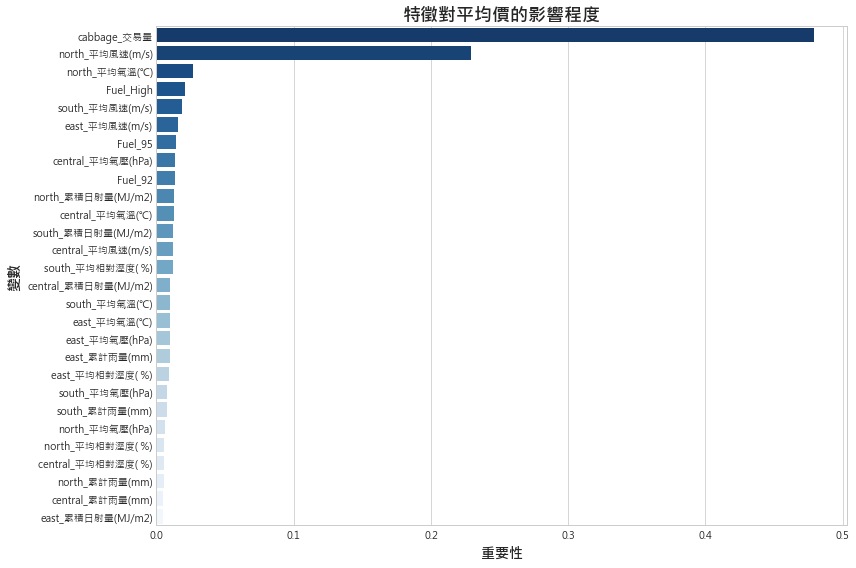

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager

font_path = 'C:/Windows/Fonts/msjh.ttc'  # 微軟正黑體字體檔案
font = font_manager.FontProperties(fname=font_path)
rcParams['font.family'] = font.get_name()  # 設定全局字體
rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 加载数据
train_data = pd.read_csv('./train.csv')


# 定義特徵與目標變數
X_columns = [
    'north_平均氣壓(hPa)', 'north_平均氣溫(℃)', 'north_平均相對溼度( %)', 'north_平均風速(m/s)',
    'north_累計雨量(mm)', 'north_累積日射量(MJ/m2)', 'south_平均氣壓(hPa)', 'south_平均氣溫(℃)',
    'south_平均相對溼度( %)', 'south_平均風速(m/s)', 'south_累計雨量(mm)', 'south_累積日射量(MJ/m2)',
    'central_平均氣壓(hPa)', 'central_平均氣溫(℃)', 'central_平均相對溼度( %)', 'central_平均風速(m/s)',
    'central_累計雨量(mm)', 'central_累積日射量(MJ/m2)', 'east_平均氣壓(hPa)', 'east_平均氣溫(℃)',
    'east_平均相對溼度( %)', 'east_平均風速(m/s)', 'east_累計雨量(mm)', 'east_累積日射量(MJ/m2)',
    'Fuel_92', 'Fuel_95', 'Fuel_High', 'cabbage_交易量'
]
y_column = 'cabbage_平均價'

X = train_data[X_columns]
y = train_data[y_column]

# 資料預處理
imputer = SimpleImputer(strategy='mean')  # 填補缺失值
scaler = StandardScaler()  # 特徵標準化

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# 使用隨機森林模型
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X, y)

# 獲取特徵重要性
feature_importances = rf_model.feature_importances_

# 將特徵重要性轉為 DataFrame
importance_df = pd.DataFrame({
    '變數': X_columns,
    '重要性': feature_importances
}).sort_values(by='重要性', ascending=False)

# 輸出特徵重要性
print(importance_df)

# 視覺化特徵重要性（支援中文）
plt.figure(figsize=(12, 8))
sns.barplot(x='重要性', y='變數', data=importance_df, palette='Blues_r')
plt.xlabel('重要性', fontsize=14, fontweight='bold')
plt.ylabel('變數', fontsize=14, fontweight='bold')
plt.title('特徵對平均價的影響程度', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


各主成分解釋的變異比例:
主成分 1: 0.3739
主成分 2: 0.1698
主成分 3: 0.1162
主成分 4: 0.0725
主成分 5: 0.0577


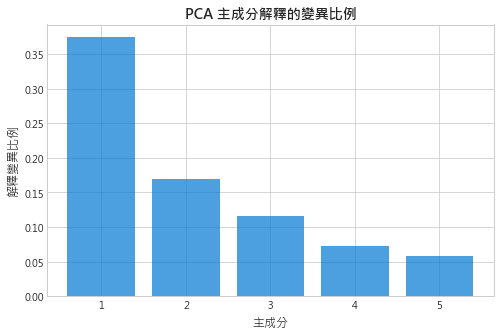


前兩個主成分的變數貢獻度:
                          主成分1      主成分2
north_平均氣壓(hPa)       0.293405 -0.099421
north_平均氣溫(℃)        -0.300092 -0.013065
north_平均相對溼度( %)      0.063238  0.272008
north_平均風速(m/s)       0.103391  0.049067
north_累計雨量(mm)        0.001605  0.307751
north_累積日射量(MJ/m2)   -0.256543 -0.176010
south_平均氣壓(hPa)       0.285368 -0.109526
south_平均氣溫(℃)        -0.298473 -0.000542
south_平均相對溼度( %)      0.049823  0.298660
south_平均風速(m/s)       0.040229 -0.108420
south_累計雨量(mm)       -0.025995  0.139062
south_累積日射量(MJ/m2)   -0.264821 -0.128599
central_平均氣壓(hPa)     0.283911 -0.115010
central_平均氣溫(℃)      -0.296988 -0.013999
central_平均相對溼度( %)   -0.063071  0.327364
central_平均風速(m/s)     0.224386  0.040586
central_累計雨量(mm)     -0.087593  0.304012
central_累積日射量(MJ/m2) -0.216606 -0.271865
east_平均氣壓(hPa)        0.282127 -0.112445
east_平均氣溫(℃)         -0.289307 -0.019033
east_平均相對溼度( %)      -0.078635  0.354219
east_平均風速(m/s)        0.110472  0.097982
east_累計雨量(mm)        -0.154526  0.264043
e

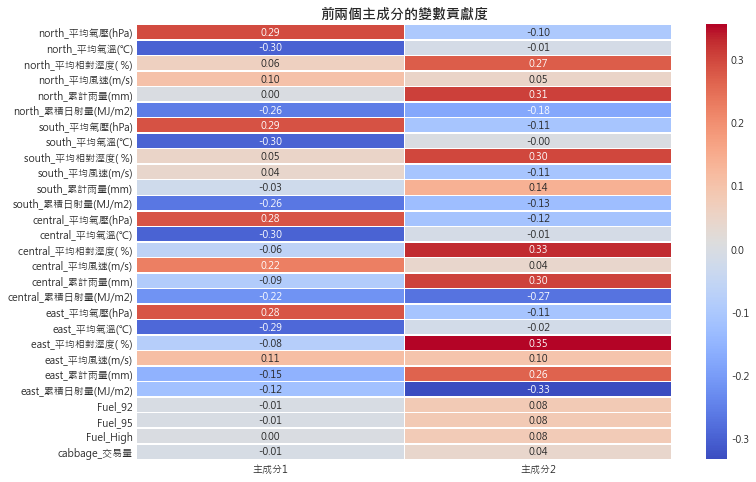

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager
import numpy as np

X = train_data[X_columns]
y = train_data[y_column]

# 資料預處理
imputer = SimpleImputer(strategy='mean')  # 填補缺失值
scaler = StandardScaler()  # 特徵標準化
X = imputer.fit_transform(X)
X = scaler.fit_transform(X)

# 進行 PCA
pca = PCA(n_components=5)  # 保留前5個主成分
X_pca = pca.fit_transform(X)

# 查看解釋變異比例
explained_variance = pca.explained_variance_ratio_
print("各主成分解釋的變異比例:")
for i, ratio in enumerate(explained_variance):
    print(f"主成分 {i+1}: {ratio:.4f}")

# 視覺化解釋變異比例
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_variance, alpha=0.7, color="#0078D4")
plt.xlabel('主成分', fontsize=12)
plt.ylabel('解釋變異比例', fontsize=12)
plt.title('PCA 主成分解釋的變異比例', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.show()

# 載荷矩陣（變數對主成分的貢獻度）
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=[f'主成分{i+1}' for i in range(5)], index=X_columns)

# 顯示前兩個主成分的載荷矩陣
print("\n前兩個主成分的變數貢獻度:")
print(loading_df[['主成分1', '主成分2']])

# 視覺化前兩個主成分的變數貢獻度
plt.figure(figsize=(12, 8))
sns.heatmap(loading_df[['主成分1', '主成分2']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("前兩個主成分的變數貢獻度", fontsize=14, fontweight='bold')
plt.show()